In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
X = 6*np.random.rand(100,1) -3
#100 rows 1 col
y = 0.5 * X**2 + 1.5*X +2 +np.random.randn(100,1)
#np.random.randn(100,1) generates random numbers from a normal distribution (mean 0, std dev 1).
#This is noise/error term added to make the data more realistic (not perfectly deterministic).

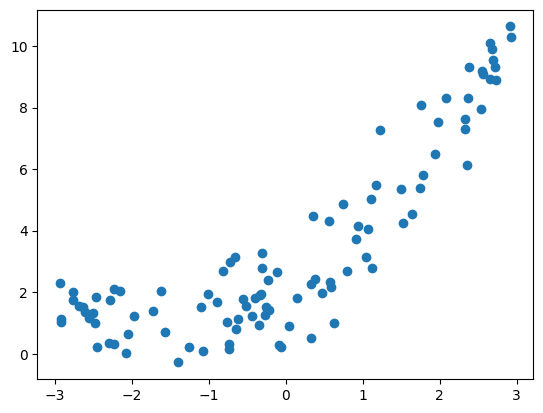

In [3]:
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# not standerdizing because already between 0 to 1 (X value)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg.predict(X_test))
print(score)
#very low accuracy , because data set is quadratic 

0.553134230363303


Text(0, 0.5, 'Y')

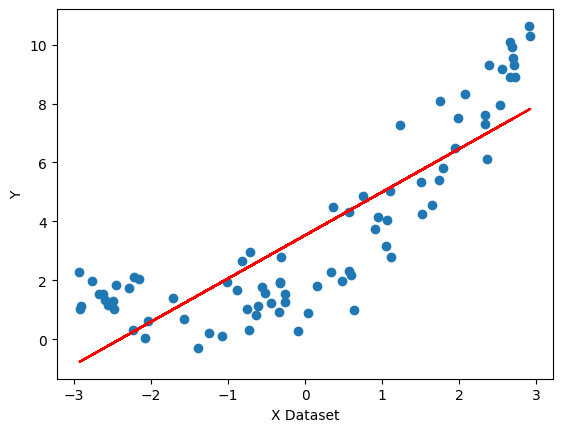

In [7]:
plt.plot(X_train,reg.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
# Create a PolynomialFeatures object to generate polynomial terms
# degree=2 → create all features up to x^2
# include_bias=True → adds a column of 1s as the bias/intercept term
#   Why bias? In linear regression, the model is y = w0 + w1*x + w2*x^2 ...
#   The bias column of 1s allows the model to learn w0 automatically
poly = PolynomialFeatures(degree=2,include_bias=True)

# Fit the transformer to the training data and transform X_train
# - Converts single feature X_train into [1, x, x^2] for each sample
# - Ensures the model can learn a quadratic relationship
X_train_poly = poly.fit_transform(X_train)

# Transform X_test using the same transformation learned from X_train
# - Do NOT call fit_transform on test data
# - Keeps the same polynomial mapping as training data
X_test_poly = poly.transform(X_test)

# Example: if X_train = [[2], [3]], X_train_poly = [[1, 2, 4], [1, 3, 9]]
# Columns explanation:
#   1 → bias (intercept) term
#   2 → original feature
#   4, 9 → squared feature (x^2)
## if multiple feautres [x1,x2] then [1,x1,x1^2,x2,x^2]


In [15]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)
##accuracy increased 

0.8177189265114484


In [16]:
print (regression.intercept_)

[1.99656027]


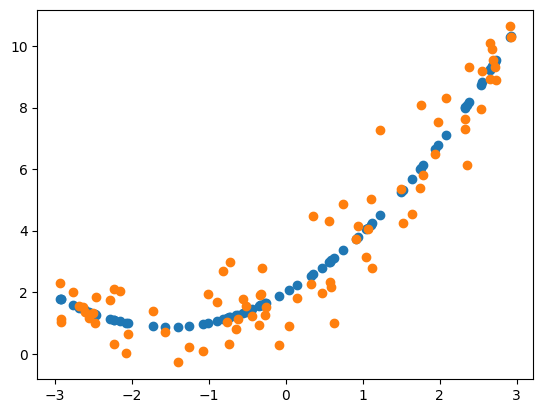

In [17]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [ ]:
#Prediction of new data 
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly
#we have to transform new data as well 

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

def poly_reg(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_feat = PolynomialFeatures(degree=degree,include_bias=True)
    ##initializing polynomial and linear reg model
    lin_reg = LinearRegression()
    #  Create a pipeline to chain polynomial feature generation and linear regression
    #    This ensures the transformation and regression happen sequentially
    poly_reg = Pipeline([
        ("poly_feat",poly_feat),("lin_reg",lin_reg)
    ])
    #The pipeline automatically transforms X_train into polynomial features
    #    and then fits the linear regression model
    poly_reg.fit(X_train,y_train)
    y_pred_new = poly_reg.predict(X_new)
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

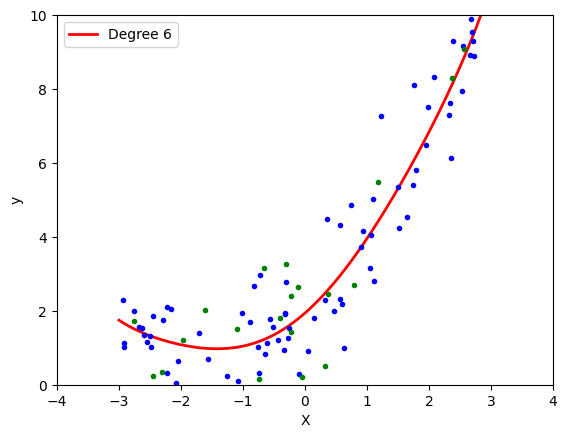

In [22]:
poly_reg(6)